# Import packages

In [1]:
import os, re
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib

import pandas as pd
import numpy as np
import OncoMarkAI as oma

/Users/caibin/miniconda3/envs/general/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## Plot setting

In [2]:
oma.pl.fig_setting()
cmap = oma.pl.cmap()
sns.set_style("ticks");
sns.despine(offset=10, trim=True);

2024-02-21 16:47:41|INFO|plotting|Figure setting updated


<Figure size 1200x900 with 0 Axes>

# Read the processed TISCH2 data of psudo bulkRNAseq expression and cell fraction

In [3]:
output_df_subset = pd.read_csv('../OncoMarkAI/data/datasets/TISCH2/Expression_of_IGSF8_and_KIR3DL2_in_TISCH2.csv', index_col=0)
output_df_subset

,genes,Celltype (major-lineage),cell_fraction,expression_level
0,IGSF8,AC-like Malignant,0.202290,1.327778
1,IGSF8,Acinar,0.123352,0.747123
2,IGSF8,Alveolar,0.187335,1.084546
3,IGSF8,Amacrine cell,0.073885,0.522065
4,IGSF8,Astrocyte,0.332233,2.036075
...,...,...,...,...
141,KIR3DL2,Tproilf,0.015257,0.114937
142,KIR3DL2,Tprolif,0.035617,0.281519
143,KIR3DL2,Treg,0.009458,0.073580
144,KIR3DL2,NaN,NaN,NaN


In [4]:
xaxis = 'genes'
x_order = ['IGSF8', 'KIR3DL2']

yaxis = 'Celltype (major-lineage)'
y_order = ["Malignant", "CD8T", "CD8Tex", "Treg", "CD4Tconv", "NK", "B", "Plasma", "DC", "Mono/Macro"]

size_key = 'cell_fraction'
color_key = 'expression_level'

In [5]:
output_df_subset = output_df_subset[output_df_subset['Celltype (major-lineage)'].isin(y_order)]

In [6]:
output_df_subset

,genes,Celltype (major-lineage),cell_fraction,expression_level
5,IGSF8,B,0.087999,0.657880
7,IGSF8,CD4Tconv,0.072466,0.585986
8,IGSF8,CD8T,0.079879,0.634379
9,IGSF8,CD8Tex,0.100599,0.783140
15,IGSF8,DC,0.130632,0.887569
38,IGSF8,Malignant,0.241321,1.576259
43,IGSF8,Mono/Macro,0.079819,0.541468
47,IGSF8,NK,0.088803,0.706786
59,IGSF8,Plasma,0.174749,1.059765
70,IGSF8,Treg,0.130374,0.970354


## Plotting

In [7]:
def size_legend_dot(input_size_values, dot_max=None, dot_min=None, size_exponent=1.5, largest_dot=80, smallest_dot=0):
    # for the dot size legend, use step between dot_max and dot_min
    # based on how different they are.
    if not dot_max:
        dot_max = np.ceil(max(input_size_values) * 20) / 20
    if not dot_min:
        dot_min = 0
    diff = dot_max - dot_min
    if 0.3 < diff <= 0.6:
        step = 0.1
    elif 0.1 < diff <= 0.3:
        step = 0.05
    elif diff <= 0.1:
        step = 0.02
    else:
        step = 0.2
    # a descending range that is afterwards inverted is used
    # to guarantee that dot_max is in the legend.
    print("step: ", step)
    size_range = np.arange(dot_max, dot_min, step * -1)[::-1]
    if dot_min != 0 or dot_max != 1:
        dot_range = dot_max - dot_min
        size_values = (size_range - dot_min) / dot_range
    else:
        size_values = size_range

    labels = [f"{np.round((x * 100), decimals=0).astype(int)}" for x in size_range]
    size = size_values**size_exponent
    size = size * (largest_dot - smallest_dot) + smallest_dot
    legend_size={}
    for l,s in zip(labels, size):
        legend_size.update({l:s})
        
    output_size = ((input_size_values - dot_min) /(dot_max - dot_min)) **size_exponent
    output_size = output_size * (largest_dot - smallest_dot) + smallest_dot
    
    return output_size, legend_size

In [8]:
marker = 'o'
largest_dot = 100
sizes, legend = size_legend_dot(output_df_subset["cell_fraction"].values, largest_dot=largest_dot)

x_to_num = {p[1]:p[0] for p in enumerate(x_order[::-1])} 
y_to_num = {p[1]:p[0] for p in enumerate(y_order)}

step:  0.05


In [9]:
legend

{'5': 8.944271909999172,
 '10': 25.29822128134705,
 '15': 46.47580015448901,
 '20': 71.55417527999329,
 '25': 100.0}

In [10]:
color_lim = [0, 1.5]
vals = output_df_subset['expression_level'].values.flatten()
vals = np.array(vals, dtype="float64")

if color_lim is None:
    max_val = np.nanmax(vals)
    min_val = np.nanmin(vals)
elif type(color_lim) == list:
    min_val, max_val = color_lim
    print(color_lim)
    
offset = mcolors.Normalize(vmin=min_val, vmax=max_val)
cmap = matplotlib.cm.Reds
colors = cmap(offset(vals))

[0, 1.5]


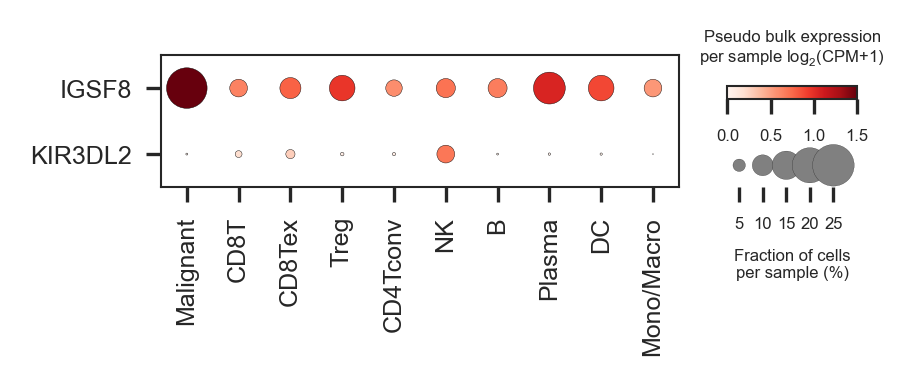

In [11]:
# set figsize
fig = plt.figure(figsize=(3.2, 0.8))
# set grid
fig.subplots_adjust(
    bottom=.2, top=.75, right=.85
)
# set gridspec
axs = fig.add_gridspec(
    nrows=30,
    ncols=2,
    wspace=.15,
    hspace=.15,
    width_ratios=[16, 4], #7
)

fig.tight_layout()

dot_ax = fig.add_subplot(axs[:, 0])
dot_ax.scatter(x = output_df_subset[yaxis].map(y_to_num),
               y = output_df_subset[xaxis].map(x_to_num),
               s = sizes,
               marker=marker, 
               linewidth=0.1,
               edgecolor='black', 
                     c = colors,)
dot_ax.set(ylim=(-0.5, len(x_order)-.5), xlim=(-0.5, len(y_order)-.5))
dot_ax.set_yticks(list(x_to_num.values()), list(x_to_num.keys()), fontsize=6);
dot_ax.set_xticks(list(y_to_num.values()), list(y_to_num.keys()), fontsize=6, rotation=90, horizontalalignment='center', );


cbar = fig.add_subplot(axs[7:10, 1])
plt.setp(cbar.spines.values(), linewidth=.5)
bar_ax = matplotlib.colorbar.ColorbarBase(
    cbar,
    cmap=cmap,
    orientation="horizontal",
    norm=offset,
    drawedges=False,
    boundaries=None,
    ticks=np.round(np.linspace(min_val, max_val, num=4)*10)/10,
)
for t in cbar.get_xticklabels():
    t.set_fontsize(4)
cbar_title = cbar.set_title("Pseudo bulk expression\nper sample log$_{2}$(CPM+1)", fontsize=4)
cbar_title.set_position([0.5, .95])  # Adjust the position here

lgd = fig.add_subplot(axs[20:, 1])
lgd.scatter(
    x= np.arange(len(legend)),
    y=[0] * len(legend),
    s=list(legend.values()),
    marker=marker,
    linewidth=.05,
    edgecolors='k',
    c="grey",
)

lgd_title = lgd.set_xlabel('Fraction of cells\nper sample (%)', fontsize=4)
lgd.set_xlim(-0.5, len(legend))
lgd.set_yticks([])
lgd.set_xticks(
    np.arange(len(legend)),
    list(legend.keys()),
    fontsize=4,
)

lgd.spines["top"].set_visible(False)
lgd.spines["right"].set_visible(False)
lgd.spines["bottom"].set_visible(False)
lgd.spines["left"].set_visible(False)
plt.savefig("../figures/Fig3B.pdf", bbox_inches = "tight")

# Read processed data from Pelka 2021

In [12]:
fraction = pd.read_csv("../OncoMarkAI/data/datasets/Pelka2021/Pelka2021_IGSF8_KIR3DL2_B2M_KLRC1_fraction.csv", header=None, index_col=0).T.set_index(["MMRStatus", "clMidwayPr"]).astype(float)
average_expr = pd.read_csv("../OncoMarkAI/data/datasets/Pelka2021/Pelka2021_IGSF8_KIR3DL2_B2M_KLRC1_average.csv", header=None, index_col=0).T.set_index(["MMRStatus", "clMidwayPr"]).astype(float)
average_expr_minmax = (average_expr - average_expr.min()) / (average_expr.max() - average_expr.min())
expr_frac_df = average_expr_minmax.join(fraction, rsuffix="_fraction", how='outer').reset_index()

In [13]:
ordered_celltype = ["Epi/Malignant", "NK", "ILC", "Tgd", "TZBTB16", "TCD8", "TCD4", "B", "Plasma", "Mono", "Macro", "DC", "Mast", "Endo", "Fibro", "Granulo", "SmoothMuscle", "Schwann", "Peri"]
expr_frac_df['clMidwayPr'] = pd.Categorical(expr_frac_df['clMidwayPr'], categories=ordered_celltype, ordered=True)
expr_frac_df["MMRStatus"] = expr_frac_df["MMRStatus"].replace("Normal", "Adjacent normal")

In [14]:
expr_frac_df.head()

,MMRStatus,clMidwayPr,IGSF8,KIR3DL2,B2M,KLRC1,IGSF8_fraction,KIR3DL2_fraction,B2M_fraction,KLRC1_fraction
0,MMRd,B,0.145183,0.006603,0.655126,0.006875,0.036039,0.000759,0.987102,0.004932
1,MMRd,DC,0.329034,0.028905,0.797448,0.018825,0.092145,0.004028,0.995468,0.015106
2,MMRd,Endo,0.218571,0.009907,0.655514,0.003513,0.068985,0.001104,0.995585,0.002759
3,MMRd,Epi/Malignant,0.817641,0.004904,0.232140,0.006906,0.278092,0.000727,0.946622,0.007376
4,MMRd,Fibro,0.515200,0.000000,0.656572,0.005566,0.154489,0.000000,0.993737,0.005219


## Plotting

In [15]:
def get_colors(values, cmap = matplotlib.cm.Reds, color_lim = None):

    vals = np.array(values, dtype="float64")

    if color_lim is None:
        max_val = np.nanmax(vals)
        min_val = np.nanmin(vals)
    elif type(color_lim) == list:
        min_val, max_val = color_lim
        print(color_lim)

    offset = mcolors.Normalize(vmin=min_val, vmax=max_val)
    colors = cmap(offset(vals))
    return colors, offset

In [16]:
ordered_celltype = ['Epi/Malignant','NK','ILC','Tgd','TZBTB16','TCD8','TCD4','B','Plasma','Mono', 'Macro','DC','Mast', 'Granulo', 'Endo', 'Fibro']

In [17]:
xaxis = 'MMRStatus'
x_order = ['Adjacent normal', 'MMRd', 'MMRp']
yaxis = 'clMidwayPr'
y_order = ordered_celltype

x_to_num = {p[1]:p[0] for p in enumerate(x_order)} 
y_to_num = {p[1]:p[0] for p in enumerate(y_order[::-1])}

gene_order = ["KIR3DL2", "IGSF8", "B2M"]
markers = {"KLRC1": "p", 
           "KIR3DL2": "h", 
           "IGSF8": "o",
           "B2M": "*"}

[0, 1]
step:  0.02
[0, 1]
step:  0.1
[0, 1]
step:  0.2


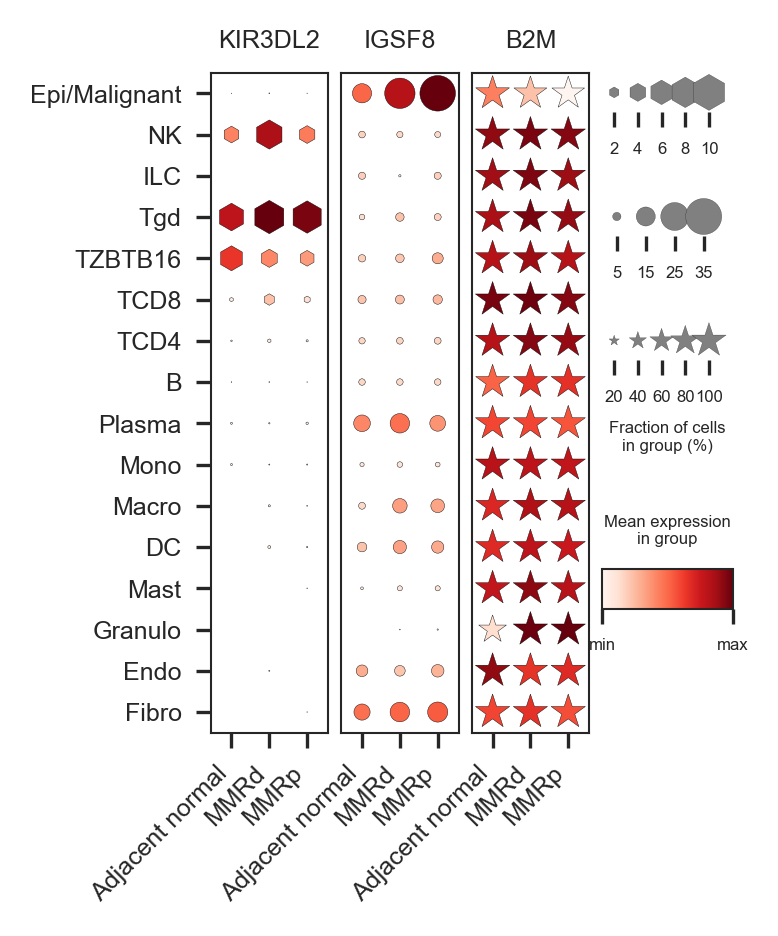

In [18]:
# set figsize
fig = plt.figure(figsize=(.6*len(gene_order)+.6, 4.))

# set grid
fig.subplots_adjust(
    bottom=.2, top=.75, right=.85
)
# set gridspec
axs = fig.add_gridspec(
    nrows=16,
    ncols=30*len(gene_order)+30,
    wspace=0.05,
    hspace=0.05,
)
fig.tight_layout()

cmap = matplotlib.cm.Reds
for i, gene in enumerate(gene_order):
    values = expr_frac_df[gene].values.flatten()
    colors, offset = get_colors(values, cmap, color_lim = [0, 1])
    sizes, legend = size_legend_dot(expr_frac_df[f"{gene}_fraction"].values, largest_dot=75)
    
    dot_ax = fig.add_subplot(axs[:, i*30:i*30+27])
    dot_ax.scatter(x = expr_frac_df[xaxis].map(x_to_num),
                   y = expr_frac_df[yaxis].map(y_to_num),
                   s = sizes,
                   marker=markers[gene], 
                   linewidth=0.1,
                   edgecolor='black',
                   c = colors,)
    dot_ax.set_title(gene)
    dot_ax.set(xlim=(-0.55, len(x_order)-.45), ylim=(-0.5, len(y_order)-.5))
    dot_ax.set_xticks(list(x_to_num.values()), list(x_to_num.keys()), fontsize=6, rotation=45, horizontalalignment='right');
    if i == 0 :
        dot_ax.set_yticks(list(y_to_num.values()), list(y_to_num.keys()), fontsize=6);
    else:
        dot_ax.set_yticks([]);

    lgd = fig.add_subplot(axs[i*3:i*3+1, 30*len(gene_order):])
    lgd.scatter(
        x= np.arange(len(legend)),
        y=[0] * len(legend),
        s=list(legend.values()),
        marker=markers[gene],
        linewidth=.05,
        edgecolors='k',
        c="grey",
    )
    lgd.set_xlim(-0.5, len(legend))
    lgd.set_yticks([])
    lgd.set_xticks(
        np.arange(len(legend)),
        list(legend.keys()),
        fontsize=4,
    )
    lgd.spines["top"].set_visible(False)
    lgd.spines["right"].set_visible(False)
    lgd.spines["bottom"].set_visible(False)
    lgd.spines["left"].set_visible(False)
    if i < 2:
        lgd_title = lgd.set_xlabel("")
    else:
        lgd_title = lgd.set_xlabel('Fraction of cells\nin group (%)', fontsize=4)
    
cbar = fig.add_subplot(axs[12:13, 30*len(gene_order):])
plt.setp(cbar.spines.values(), linewidth=.5)
bar_ax = matplotlib.colorbar.ColorbarBase(
    cbar,
    cmap=cmap,
    orientation="horizontal",
    norm=offset,
    drawedges=False,
    boundaries=None,
    ticks=np.round(np.linspace(0, 1., num=2)*10)/10,
)
bar_ax.set_ticklabels(['min', 'max'])

for t in cbar.get_xticklabels():
    t.set_fontsize(4)
cbar_title = cbar.set_title("Mean expression\nin group", fontsize=4)
cbar_title.set_position([0.5, .95])  # Adjust the position here

plt.savefig("../figures/Fig3D.pdf", bbox_inches = "tight")